### Treść zadania

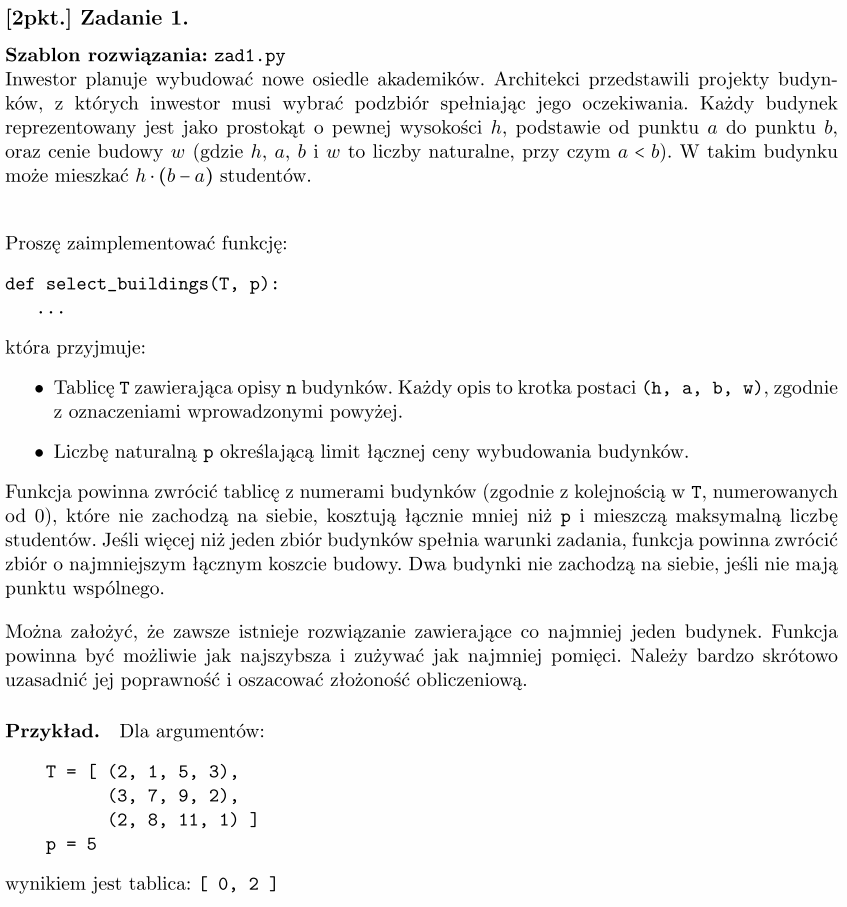

### Testy

##### Testy dostarczone wraz z zadaniem

In [1]:
import copy

P1 = ([(2, 1, 5, 3), (3, 7, 9, 2), (2, 8, 11, 1)], 6)
R1 = [0, 2]

P2 = ([(8, 2, 6, 2), (9, 4, 8, 5), (9, 8, 9, 2), (3, 10, 15, 1), ], 7)
R2 = [0, 2, 3]

P3 = ([(7, 23, 24, 1), (2, 10, 14, 3), (7, 17, 22, 1), (9, 20, 22, 2), (4, 19, 22, 8), (2, 2, 6, 1)], 10)
R3 = [0, 1, 2, 5]

P4 = ([(1, 8, 12, 5), (4, 7, 8, 2), (3, 2, 3, 6), (9, 7, 8, 5), (8, 21, 22, 8), (5, 4, 7, 10), (1, 21, 24, 10),
       (7, 14, 16, 1)], 32)
R4 = [0, 2, 4, 5, 7]

TESTS = [(P1, R1),
         (P2, R2),
         (P3, R3),
         (P4, R4)]


def runtests(f):
    OK = True
    for (P, R) in TESTS:
        print("----------------------")
        print("P =", P)
        res = f(P[0], P[1])

        w = s = 0
        for a in range(len(res)):
            w += P[0][res[a]][3]
            s += P[0][res[a]][0] * (P[0][res[a]][2] - P[0][res[a]][1])
        print("otrzymany wynik  =", res, 'wart =', w, 'stud =', s)

        w = s = 0
        for a in range(len(R)):
            w += P[0][R[a]][3]
            s += P[0][R[a]][0] * (P[0][R[a]][2] - P[0][R[a]][1])
        print("oczekiwany wynik =", R, 'wart =', w, 'stud =', s)

        if res != R:
            print("Blad!")
            OK = False
        else:
            print()
    print("----------------------")

    if OK:
        print("OK!")
    else:
        print("Bledy!")

### Złożoność

###### Obliczeniowa:
$ O(n \cdot log(n) + n \cdot p) $, gdzie: <br>
$ n $ - liczba budynków, <br>
$ p $ - maksymalny koszt budowy.
###### Pamięciowa:
$ O(n \cdot p) $

### Implementacja

In [2]:
def find_prev_building(T, l, r, val):
    while l <= r:
        mid = (l + r) // 2
        if T[mid][2] < val:
            l = mid + 1
        else:
            r = mid - 1
    return l - 1


def get_prev_buildings(T):
    n = len(T)
    prev = [None] * n
    for i in range(n):
        a = T[i][1]
        prev[i] = find_prev_building(T, 0, i, a)
    return prev


def get_students_counts(T):
    return [(b[2] - b[1]) * b[0] for b in T]


def get_buildings_list(T, F, best_w):
    indices = []
    w = best_w
    for i in range(len(F)-1, 0, -1):
        # If we have taken an item from the 'i'th row, a number of students 
        # stored in this row will be different than a profit in a row above
        if F[i][w] != F[i - 1][w]:
            # We take this building to the solution and reduce remaining cost
            indices.append(i)
            w -= T[i][3]
    # As we will never check the first row in a loop above, we have
    # to asses whether the item from the first row was taken separately
    # We decide to take the first element only if the remaining cost
    # which can be used is no lower than cost of this element
    if w >= T[0][3]: indices.append(0)
    
    # Reverse the result array as we get indices in a reversed order
    indices.reverse()
    
    return indices


def students_knapsack(T, p, prev, counts):
    n = len(T)
    F = [[0] * (p + 1) for _ in range(n)]
    
    # Add a number of students we can store only in the first building
    for w in range(T[0][3], p + 1):
        F[0][w] = counts[0]
        
    # Add max number of students which can live in buildings of cost 0
    # (I assume it is possible that a building is free)
    for i in range(1, n):
        F[i][0] = F[i - 1][0]
        if T[i][3] == 0:
            if prev[i] >= 0:
                F[i][0] = max(F[i][0], counts[i] + F[prev[i]][0])
            elif counts[i] > F[i][0]:
                F[i][0] = counts[i]
        
    # Fill the remaining part of the F array
    for i in range(1, n):
        for w in range(p + 1):
            F[i][w] = F[i - 1][w]
            if T[i][3] <= w:
                if prev[i] >= 0:
                    F[i][w] = max(F[i][w], counts[i] + F[prev[i]][w - T[i][3]])
                elif counts[i] > F[i][w]:
                    F[i][w] = counts[i]
                    
    # Find the maximum number of students which can live for the minimum cost
    best_w = 0
    for w in range(1, p + 1):
        if F[n - 1][w] > F[n - 1][best_w]:
            best_w = w
            
    return F, best_w


def select_buildings(T, p):
    n = len(T)
    # Sort all buildings by their second coordinate
    A = sorted(T, key=lambda b: b[2])
    prev = get_prev_buildings(A)
    counts = get_students_counts(A)
    # Calculate the largest number of students for the least cost
    F, best_w = students_knapsack(A, p, prev, counts)
    # Get indices of buildings which were taken
    ind = get_buildings_list(A, F, best_w)
    # Restore the original buildings indices
    ind_orig = sorted(range(n), key=lambda i: T[i][2])
    for i in range(len(ind)):
        ind[i] = ind_orig[ind[i]]
    # Sort the resulting array of indices
    ind.sort()
            
    return ind #, F[n - 1][best_w]

###### Kilka testów

In [3]:
runtests(select_buildings)

----------------------
P = ([(2, 1, 5, 3), (3, 7, 9, 2), (2, 8, 11, 1)], 6)
otrzymany wynik  = [0, 2] wart = 4 stud = 14
oczekiwany wynik = [0, 2] wart = 4 stud = 14

----------------------
P = ([(8, 2, 6, 2), (9, 4, 8, 5), (9, 8, 9, 2), (3, 10, 15, 1)], 7)
otrzymany wynik  = [0, 2, 3] wart = 5 stud = 56
oczekiwany wynik = [0, 2, 3] wart = 5 stud = 56

----------------------
P = ([(7, 23, 24, 1), (2, 10, 14, 3), (7, 17, 22, 1), (9, 20, 22, 2), (4, 19, 22, 8), (2, 2, 6, 1)], 10)
otrzymany wynik  = [0, 1, 2, 5] wart = 6 stud = 58
oczekiwany wynik = [0, 1, 2, 5] wart = 6 stud = 58

----------------------
P = ([(1, 8, 12, 5), (4, 7, 8, 2), (3, 2, 3, 6), (9, 7, 8, 5), (8, 21, 22, 8), (5, 4, 7, 10), (1, 21, 24, 10), (7, 14, 16, 1)], 32)
otrzymany wynik  = [0, 2, 4, 5, 7] wart = 30 stud = 44
oczekiwany wynik = [0, 2, 4, 5, 7] wart = 30 stud = 44

----------------------
OK!
